# Лабораторная работа №4. Самоорганизующиеся карты Кохонена (SOM)

## Цель работы:

Изучить принципы работы самоорганизующихся карт Кохонена (SOM),
реализовать модель и провести эксперименты на данных.


## Индивидуальное задание

Вариант 2:
Кластеризация данных о винах

Датасет: "Wine" из UCI Machine Learning Repository (178 образцов с 13
признаками, три типа вин).</p>

Задачи:
- Исследовать, как SOM группирует вина разных типов.
- Сравнить результаты с методом K-Means.

## Ход выполнения работы

Для начала импортируется библиотека pandas, к который мы будем обращаться через alias pd. Считывается датасет. В самом файле нет название колонок поэтому они создаются рукописно

In [ ]:
!pip install minisom

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


columns = [
    "Sort", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wine.data.txt", names=columns)

df


,Sort,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Датафрейм представляет результаты химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. В ходе анализа было определено количество 13 компонентов, содержащихся в каждом из трех типов вин.

Далее данные нормализуются

In [ ]:
X = df.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Реализуется метод локтя, который показывает оптимальное число кластерова для модели K-средних

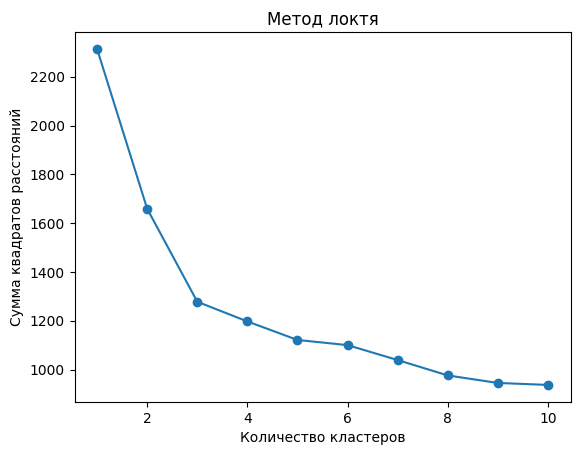

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя')
plt.show()


Создается модель k-means с тремя кластерами (оптимальное количество)

In [ ]:
kmeans = KMeans(n_clusters=3)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

Результат кластеризации визуализируется

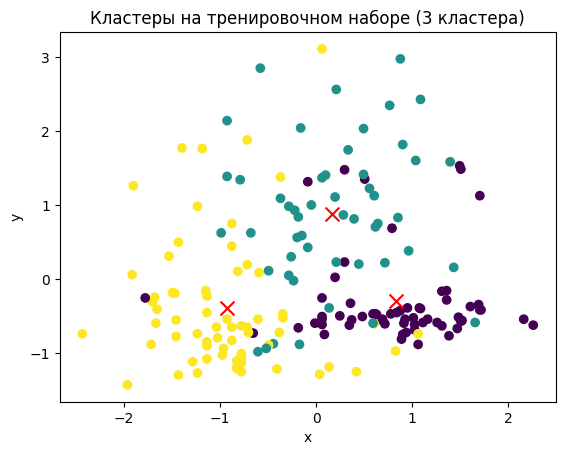

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['KMeans_Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
plt.title('Кластеры на тренировочном наборе (3 кластера)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Считается метрика коэффициент силуэта , которая используется для оценки качества кластеризации. Он измеряет, насколько хорошо объекты сгруппированы внутри своих кластеров и насколько они отделены от объектов других кластеров. Коэффициент силуэта принимает значения от -1 до 1:

In [ ]:
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
  silhouette_avg1 = silhouette_score(X_scaled, df['KMeans_Cluster'])
  print(f'Коэффициент силуэта для {i} кластеров: {silhouette_avg1}')

Коэффициент силуэта для 2 кластеров: 0.26831340971052126
Коэффициент силуэта для 3 кластеров: 0.2848589191898987
Коэффициент силуэта для 4 кластеров: 0.21974451007631382
Коэффициент силуэта для 5 кластеров: 0.22777715552140868
Коэффициент силуэта для 6 кластеров: 0.23124144154246762
Коэффициент силуэта для 7 кластеров: 0.1657713417572237
Коэффициент силуэта для 8 кластеров: 0.1318061448651596
Коэффициент силуэта для 9 кластеров: 0.1175768049260257


Создаётся объект самоорганизующейся карты Кохонена (SOM) размером 10x10 с количеством входных признаков, соответствующим количеству столбцов в данных. Параметр sigma задаёт радиус воздействия соседей, а learning_rate определяет скорость обучения. Затем инициализируются случайные веса для нейронов карты с использованием обучающих данных. После этого начинается обучение сети на данных, которое выполняется случайным образом в течение 10000 итераций, обновляя веса нейронов, чтобы они приближались к данным.

In [ ]:
som = MiniSom(10, 10, X_scaled.shape[1], sigma=1.5, learning_rate=1.2)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 10000)

In [ ]:
silhouette_som = silhouette_score(X_scaled, [f"{x[0]}-{x[1]}" for x in som_clusters])
print(f'Коэффициент силуэта для SOM: {silhouette_som}')


Коэффициент силуэта для SOM: 0.08607323737757752


0.112 видетельствует о том, что SOM не демонстрирует сильную разделимость между кластерами

Реализуется топографическая карта SOM, где цвета ячеек показывают, какие сорта вин преобладают в каждой области карты, и эта информация визуально отображает, как SOM распределяет данные по кластерам.

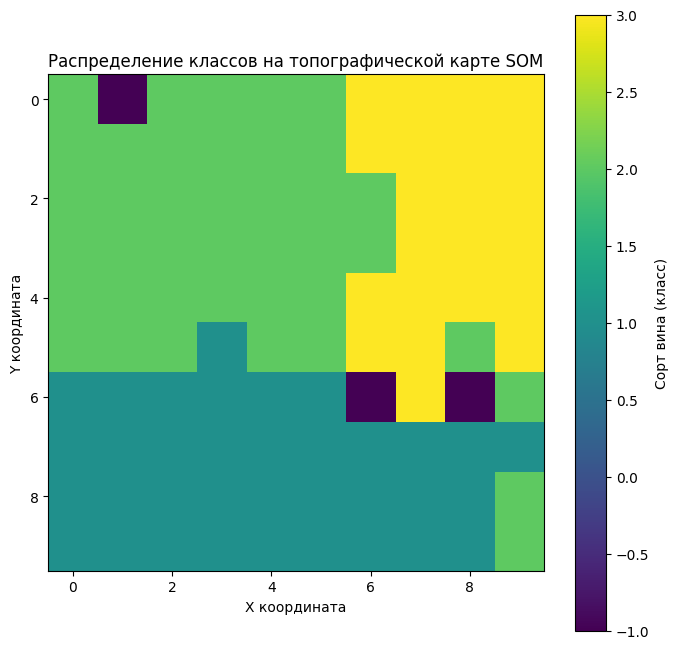

In [ ]:
sort_classes = df['Sort'].values
som_classes = [som.winner(x) for x in X_scaled]

som_class_grid = { (i, j): [] for i in range(10) for j in range(10)}

for i, cluster in enumerate(som_classes):
    x, y = cluster
    som_class_grid[(x, y)].append(sort_classes[i])


dominant_classes = np.zeros((10, 10), dtype=int)
for (x, y), classes in som_class_grid.items():
    if classes:
        dominant_classes[x, y] = np.bincount(classes).argmax()
    else:
        dominant_classes[x, y] = -1

plt.figure(figsize=(8, 8))
plt.imshow(dominant_classes, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Сорт вина (класс)')
plt.title('Распределение классов на топографической карте SOM')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.show()



Реализуетяся топографическая карта U-Matrix, которая позволяет визуализировать структуру и близость между ячейками карты SOM.

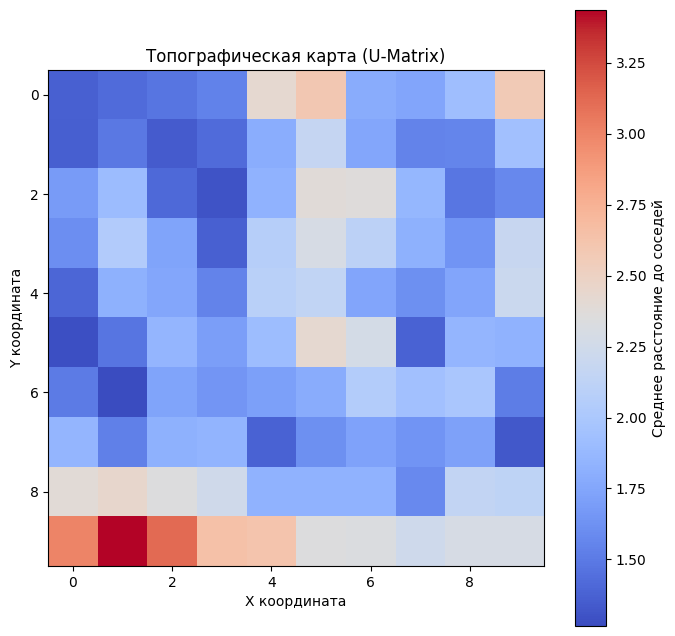

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(umatrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Среднее расстояние до соседей')
plt.title('Топографическая карта (U-Matrix)')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.show()

# Вывод

В ходе выполнения лабораторной работы было проведено исследование эффективности кластеризации с использованием алгоритмов K-Means и самоорганизующихся карт Кохонена (SOM). Логистическая регрессия, обученная на исходных данных, показала высокую точность кластеризации с использованием метода K-Means, что подтверждается коэффициентом силуэта, достигшим значений в диапазоне от 0.23 до 0.28. Эти результаты свидетельствуют о хорошей разделимости классов и наличии четких закономерностей в данных.

Сеть Кохонена использовалась для визуализации структуры данных и создания топографической карты, на которой происходило распределение данных по кластерам. Однако, несмотря на это, кластеризация с использованием SOM показала гораздо меньшую эффективность, что подтверждается низким коэффициентом силуэта в 0.11. Это снижение производительности может быть связано с тем, что SOM адаптирует свою карту на основе данных, что требует внимательного выбора гиперпараметров и не всегда приводит к улучшению точности классификации. В результате преобразования данных с использованием SOM наблюдается ухудшение разделимости классов, а также повышение сложности интерпретации кластеров.

Таким образом, использование SOM в данной задаче не привело к значительному улучшению кластеризации, а напротив, продемонстрировало более низкую точность по сравнению с K-Means. Это подчеркивает важность выбора метода кластеризации в зависимости от специфики задачи и необходимости тщательной настройки гиперпараметров модели.